# Predict average user rating of a book

**Goodreads Rating Prediction Using Linear Regression, Random Forest and Support Vector Machine.**

The goal of this analysis is to predict book rating and to understand what are the important factors that make a book more popular than others. The sections of this analysis include:

Data Exploration

Data Cleaning

Data Visualisation

Data Preprocessing

Machine Learning Model

**Data Exploration**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [3]:
# read the data
data = pd.read_csv('books.csv', error_bad_lines = False)

In [4]:
# show the first few rows
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78E+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78E+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78E+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78E+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78E+12,eng,435,2149872,33964


In [5]:
# check basic features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


In [6]:
# check no. of records
len(data)

13719

**Data Cleaning**

In [7]:
# check for doublications
data.duplicated().any()

False

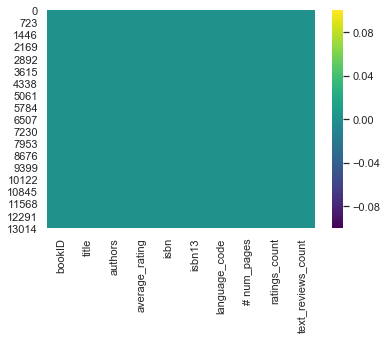

In [8]:
sns.heatmap(data.isnull(), cmap='viridis')

In [9]:
data['average_rating'] = pd.to_numeric(data['average_rating'], errors='coerce')
data['# num_pages'] = pd.to_numeric(data['# num_pages'], errors='coerce')

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(13714, 10)

**Data Visualisation**

Text(0, 0.5, 'Frequency')

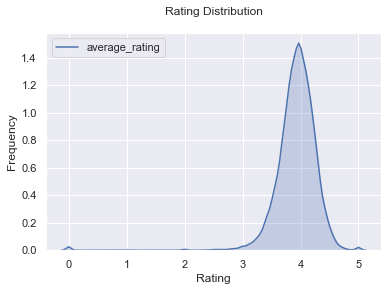

In [12]:
# ratings distribution
sns.kdeplot(data['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

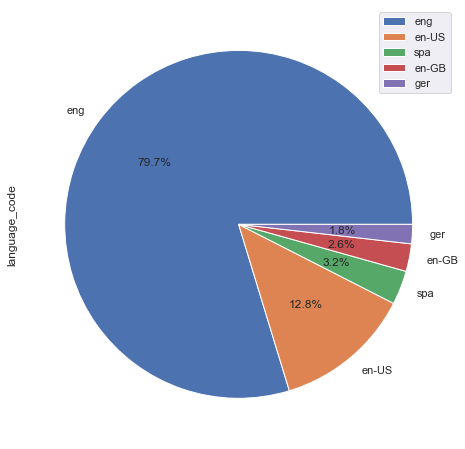

In [13]:
# top 5 languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

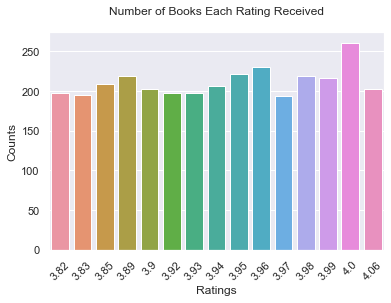

In [14]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

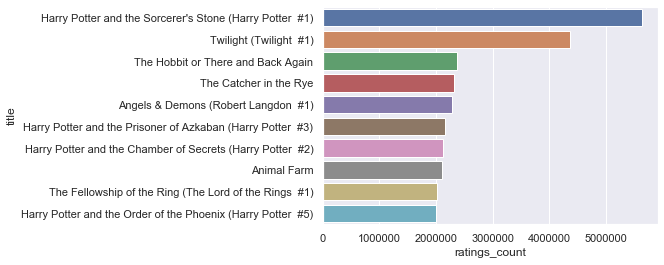

In [15]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

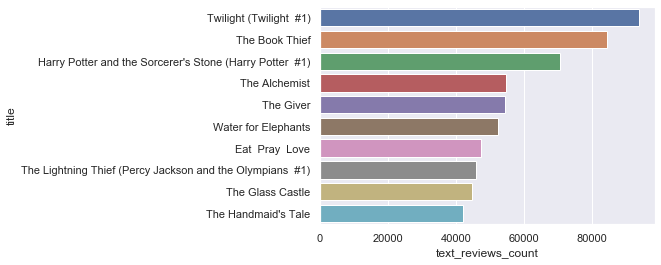

In [16]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

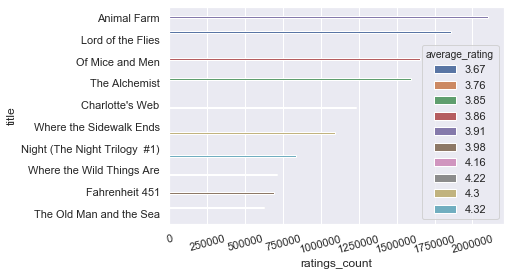

In [17]:
# top 10 books under 200 pages for busy book lovers
under200 = data[data['# num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(top10under200['ratings_count'], top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)

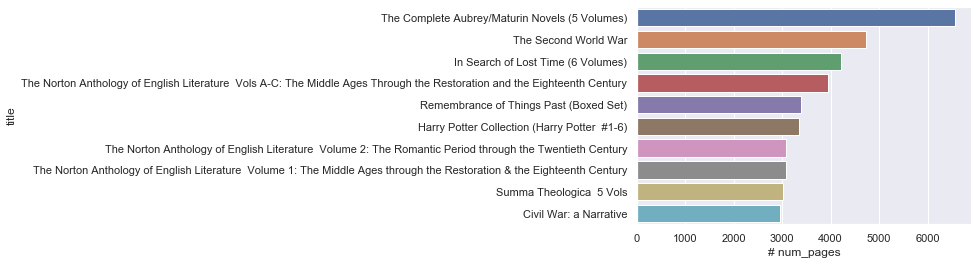

In [18]:
# top 10 longest books
longest_books = data.nlargest(10, ['# num_pages']).set_index('title')
sns.barplot(longest_books['# num_pages'], longest_books.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

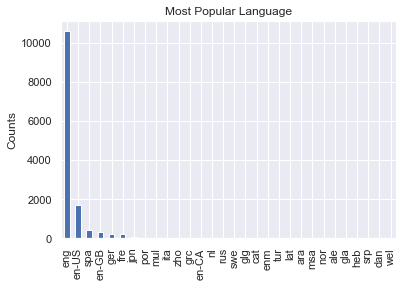

In [19]:
# top languages
data['language_code'].value_counts().plot(kind='bar')
plt.title('Most Popular Language')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

Text(0.5, 0, 'Number of Publications')

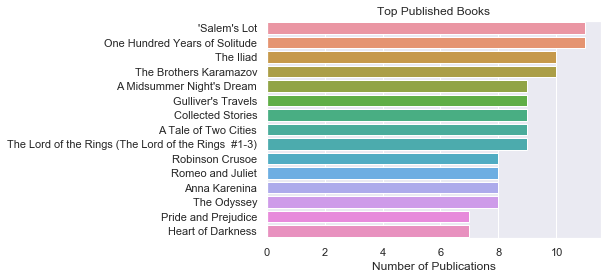

In [20]:
# top published books
sns.barplot(data['title'].value_counts()[:15], data['title'].value_counts().index[:15])
plt.title('Top Published Books')
plt.xlabel('Number of Publications')

Text(0.5, 0, 'Total Ratings')

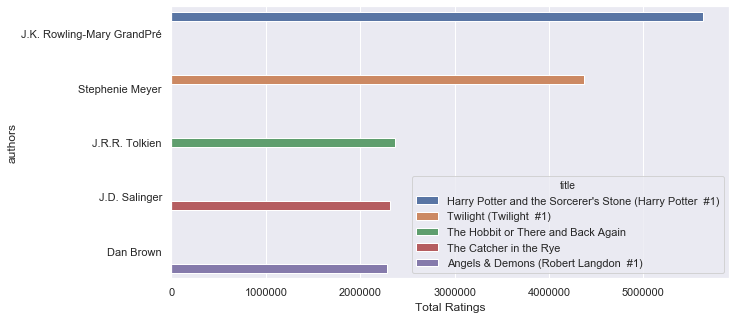

In [21]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

Text(0.5, 0, 'No. of Publications')

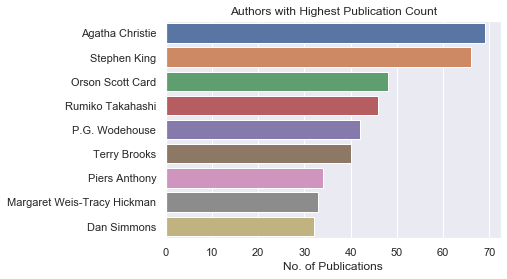

In [22]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

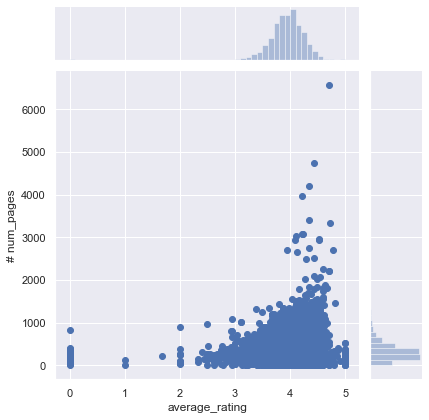

In [23]:
# visualise a bivariate distribution between ratings & no. of pages
sns.jointplot(x = 'average_rating', y = '# num_pages', data = data)

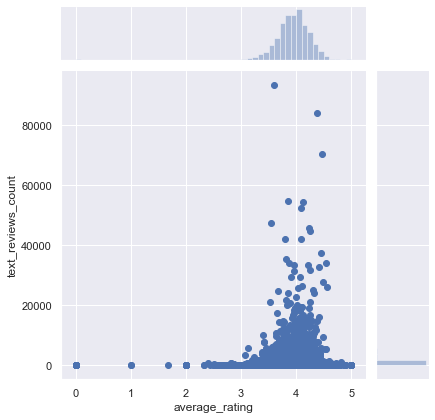

In [24]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data)

In [25]:
data.shape

(13714, 10)

**Data Preprocessing**

**Outliers Detection**

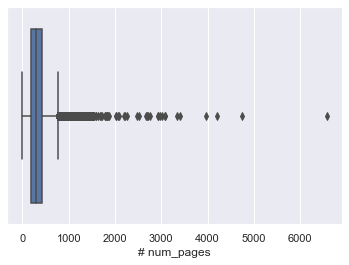

In [26]:
# find no. of pages outliers
sns.boxplot(x=data['# num_pages'])

In [27]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['# num_pages'] >= 1000])

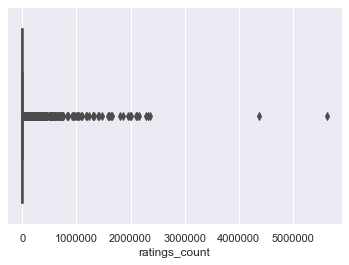

In [28]:
# find ratings count outliers
sns.boxplot(x=data['ratings_count'])

In [29]:
# remove outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])

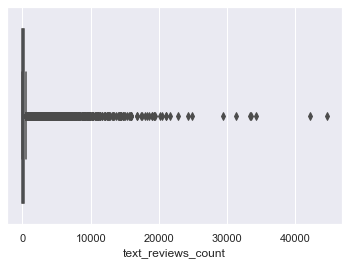

In [30]:
# find ratings count outliers
sns.boxplot(x=data['text_reviews_count'])

In [31]:
# remove outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

In [32]:
data.shape

(13379, 10)

**Feature Engineering**

In [33]:
# encode title column
le = preprocessing.LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [34]:
# encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [35]:
# encode language column
enc_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, enc_lang], axis = 1)

In [36]:
# divide the data into attributes and labels
X = data.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
y = data['average_rating']

In [37]:
data.shape

(13379, 40)

In [38]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
3,4,3652,2970,4.41,439554896,9.78E+12,eng,352.0,6267,272,...,0,0,0,0,0,0,0,0,0,0
6,9,11402,7094,3.69,976540606,9.78E+12,en-US,152.0,18,1,...,0,0,0,0,0,0,0,0,0,0
8,12,10744,1652,4.38,517226952,9.78E+12,eng,815.0,3602,258,...,0,0,0,0,0,0,0,0,0,0
9,13,10743,1652,4.38,345453743,9.78E+12,eng,815.0,240189,3954,...,0,0,0,0,0,0,0,0,0,0
10,14,9202,1652,4.22,1400052920,9.78E+12,eng,215.0,4416,408,...,0,0,0,0,0,0,0,0,0,0


**Machine Learning Model**

**Train Test Split**

In [39]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

**Feature Scaling**

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression**

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predictions_lr = lr.predict(X_test)

In [43]:
pred_lr = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions_lr.tolist()}).head(25)
pred_lr.head(10)

,Actual,Predicted
0,3.89,3.909622
1,3.68,3.852845
2,4.24,3.965320
3,4.16,3.956114
4,3.95,3.847901
5,4.18,3.961482
6,3.30,3.907152
7,4.08,3.882444
8,3.61,3.906525
9,3.93,3.884567


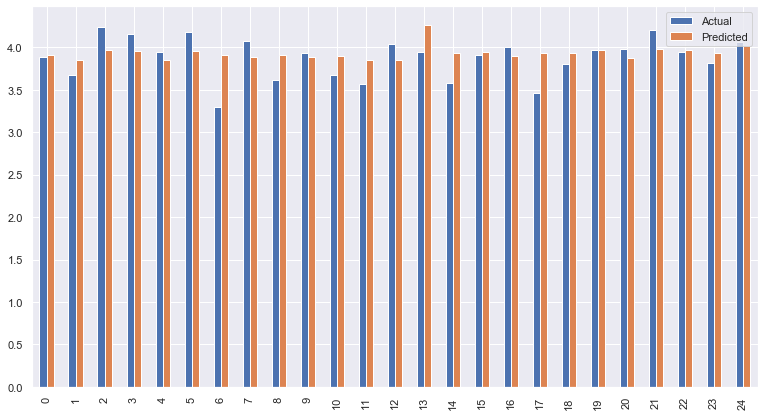

In [44]:
# visualise the above comparison result
pred_lr.plot(kind='bar', figsize=(13, 7))

In [45]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

MAE: 0.22596587341982466
MSE: 0.11233335285258261
RMSE: 0.33516168165913984


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
rf = RandomForestRegressor(max_depth=3,n_estimators = 10, random_state=42)
# Fit on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [47]:
print(rf.feature_importances_)

[0.1162445  0.02231528 0.04485519 0.         0.29064799 0.48752467
 0.00067992 0.         0.         0.         0.         0.
 0.         0.         0.03199586 0.         0.         0.00236884
 0.         0.         0.00336775 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [49]:
predictions_rf = rf.predict(X_test)

In [50]:
pred_rf = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions_rf.tolist()}).head(25)
pred_rf.head(10)

,Actual,Predicted
0,3.89,3.910479
1,3.68,3.910479
2,4.24,4.054354
3,4.16,3.923078
4,3.95,3.920723
5,4.18,4.004438
6,3.30,3.910479
7,4.08,3.910479
8,3.61,3.910479
9,3.93,3.910479


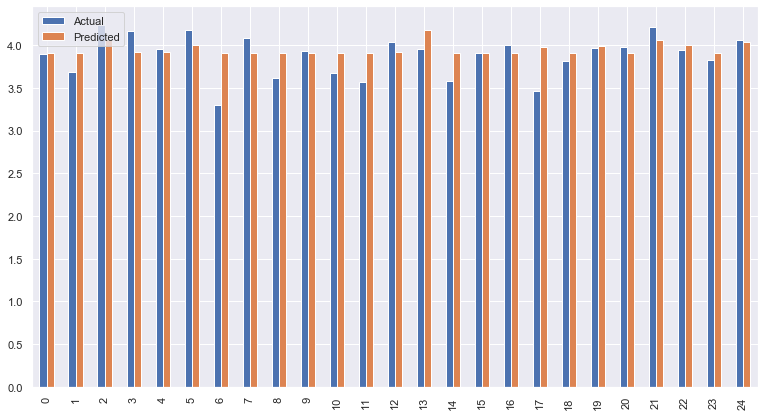

In [51]:
# visualise the above comparison result
pred_rf.plot(kind='bar', figsize=(13, 7))

In [52]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rf))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

MAE: 0.2250311461768639
MSE: 0.10359030693976937
RMSE: 0.3218544809999845


**Support Vector Machine**

In [53]:
from sklearn.svm import SVR

In [54]:
regressor_svm = SVR(gamma='scale', kernel='rbf')
regressor_svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
predictions_svm = regressor_svm.predict(X_test)

In [56]:
pred_svm = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions_svm.tolist()}).head(25)
pred_svm.head(10)

,Actual,Predicted
0,3.89,3.904716
1,3.68,3.855716
2,4.24,4.042997
3,4.16,4.003278
4,3.95,3.943679
5,4.18,3.958215
6,3.30,3.936297
7,4.08,4.010197
8,3.61,3.934722
9,3.93,3.959308


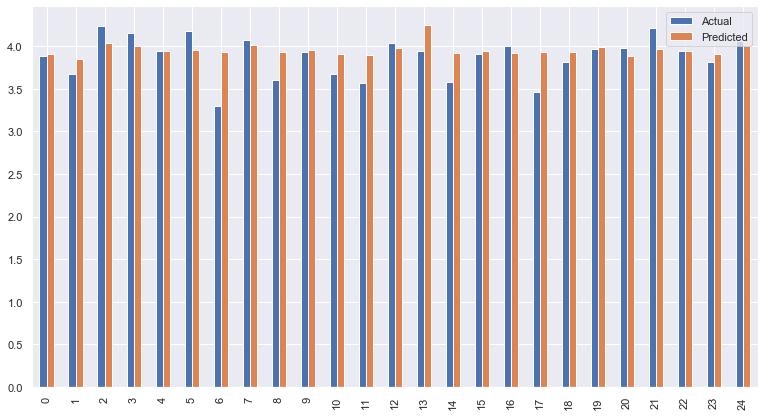

In [57]:
# visualise the above comparison result
pred_svm.plot(kind='bar', figsize=(13, 7))

In [58]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions_svm))
print('MSE:', metrics.mean_squared_error(y_test, predictions_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_svm)))

MAE: 0.22150458839259493
MSE: 0.11119676076148455
RMSE: 0.3334617830598951
